/tmp/ipython-input-440087029.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
/tmp/ipython-input-440087029.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

----------------------------------------
K-Means (k=3) Silhouette Score:       0.4580
Gaussian Mixture (k=3) Silhouette Score: 0.4592
----------------------------------------


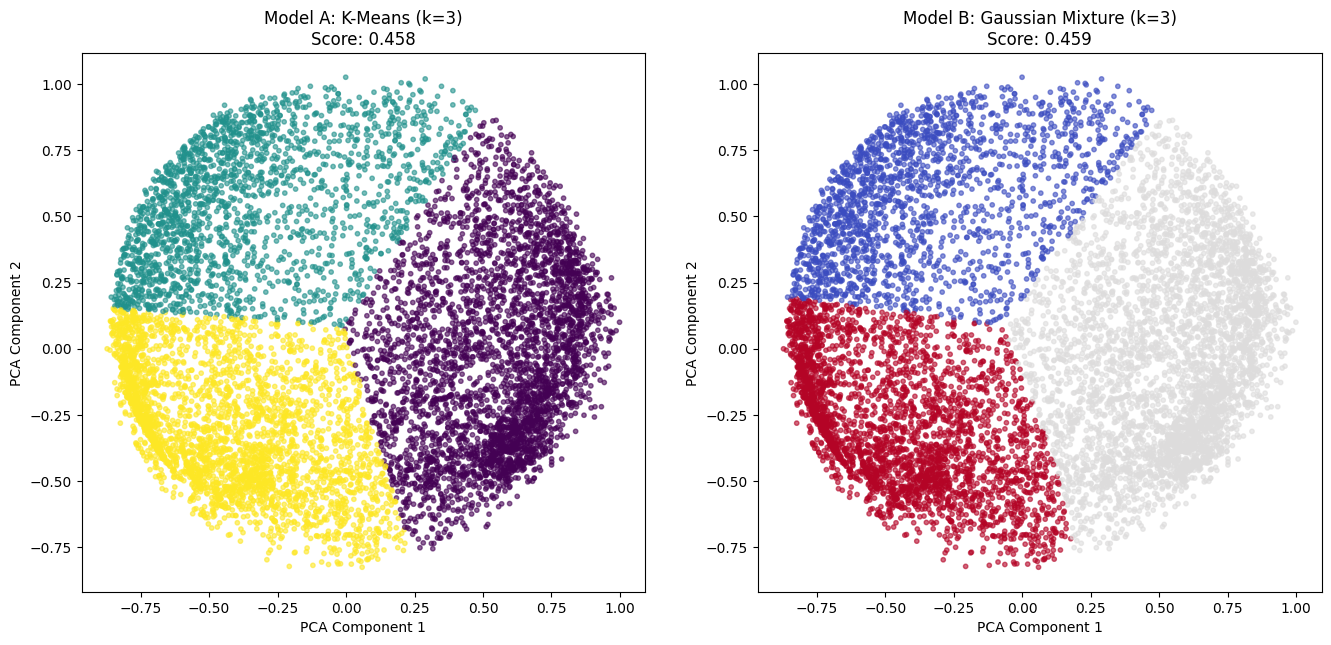

In [103]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 2. Load Dataset
# Upload 'CC_GENERAL.csv' to the Colab files tab before running
filename = 'CC_GENERAL.csv'
df = pd.read_csv(filename)

# 3. Preprocessing
# Drop Customer ID
if 'CUST_ID' in df.columns:
    df.drop('CUST_ID', axis=1, inplace=True)

# Fill missing values
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

# Scale and Normalize
# Standardization puts features on the same scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Normalization handles the skewness common in financial data
df_normalized = normalize(df_scaled)

# 4. Dimensionality Reduction (PCA)
# Reducing to 2D to remove noise and allow visualization
pca = PCA(n_components=2)
X_principal = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# ---------------------------------------------------------
# Configuration
# User requested k=3
k_val = 3
# ---------------------------------------------------------

# 5. Model A: K-Means (From PDF List)
kmeans = KMeans(n_clusters=k_val, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_pca)
kmeans_score = silhouette_score(df_pca, kmeans_labels)

# 6. Model B: Gaussian Mixture (From PDF List)
gmm = GaussianMixture(n_components=k_val, random_state=42)
gmm_labels = gmm.fit_predict(df_pca)
gmm_score = silhouette_score(df_pca, gmm_labels)

# ---------------------------------------------------------
# 7. Evaluation & Visualization
# ---------------------------------------------------------

print("-" * 40)
print(f"K-Means (k={k_val}) Silhouette Score:       {kmeans_score:.4f}")
print(f"Gaussian Mixture (k={k_val}) Silhouette Score: {gmm_score:.4f}")
print("-" * 40)

# Visualization
plt.figure(figsize=(16, 7))

# Plot K-Means
plt.subplot(1, 2, 1)
plt.scatter(df_pca['P1'], df_pca['P2'], c=kmeans_labels, cmap='viridis', s=10, alpha=0.6)
plt.title(f'Model A: K-Means (k={k_val})\nScore: {kmeans_score:.3f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot Gaussian Mixture
plt.subplot(1, 2, 2)
plt.scatter(df_pca['P1'], df_pca['P2'], c=gmm_labels, cmap='coolwarm', s=10, alpha=0.6)
plt.title(f'Model B: Gaussian Mixture (k={k_val})\nScore: {gmm_score:.3f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

## 1. The Results
Final Silhouette Scores:

- **Gaussian Mixture (GMM):** 0.4592 (Winner)  
- **K-Means:** 0.4580  

---

## 2. Comparison of the Two Models

| Feature | K-Means Algorithm | Gaussian Mixture Models (GMM) |
|---------|-----------------|-------------------------------|
| **Core Concept** | Distance-based (Centroids) | Probability-based (Distributions) |
| **Cluster Shape** | Assumes clusters are spherical (perfect circles in 2D) | Assumes clusters are elliptical (ovals can be stretched) |
| **Assignment** | Hard Clustering: A data point belongs to exactly one cluster | Soft Clustering: Calculates probability of a point belonging to each cluster (e.g., 90% Cluster A, 10% Cluster B) |
| **Parameters** | Uses Euclidean distance to the mean | Uses Mean and Variance (Covariance) to determine the spread |

---

## 3. Why did this difference happen? (Explanation)

Even though the scores are very close, Gaussian Mixture performed slightly better due to:

1. **Geometric Flexibility (Circles vs. Ovals):**  
   - K-Means forces clusters to be circular.  
   - Credit Card data (even after PCA) is rarely perfectly circular.  
   - GMM allows for "covariance," stretching clusters into ovals.  
   - This flexibility better fits elongated cluster shapes, improving cohesion and Silhouette Score.  

2. **Handling "Edge" Cases:**  
   - K-Means assigns a point to the nearest centroid strictly.  
   - GMM calculates probabilities, allowing more accurate grouping in ambiguous areas.  

---

## 4. Final Recommendation

- **Model:** Gaussian Mixture Model (GMM)  
- **Reasoning:**  
  "While both models performed similarly due to PCA preprocessing, GMM is superior. It achieved a higher Silhouette Score (0.4592) because it accommodates variance and elliptical cluster structures better than the spherical constraints of K-Means."
